Credit: The codes below was modified from the original IBM Tutorial "Build a recommendation engine with a restricted Boltzmann machine using TensorFlow"

link: https://developer.ibm.com/technologies/deep-learning/tutorials/build-a-recommendation-engine-with-a-restricted-boltzmann-machine-using-tensorflow/

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
%matplotlib inline

<hr>

# Load dataset

In [2]:
#Loading in the movies dataset
movies_df = pd.read_csv("movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movieid_dict = pd.Series(data = movies_df.title.values, index=movies_df.movieId).to_dict()

We can do the same for the ratings.dat file:

In [4]:
#Loading in the ratings dataset
ratings_df = pd.read_csv("ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


<hr>

# Creat User-item matrix

Now, we can start formatting the data into input for the RBM. We're going to store the normalized users ratings into as a matrix of user-rating called trX, and normalize the values.

In [5]:
user_item_mat = ratings_df.pivot(index='userId', columns='movieId', values='rating')
user_item_mat.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets normalize it now:

In [6]:
trX = user_item_mat.fillna(0) / 5.0 #normalize the matrix and fill NA with 0 values
trX

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.6,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<hr>

# Setting the Model's Parameters

Next, let's start building our RBM with TensorFlow. We'll begin by first determining the number of neurons in the hidden layers and then creating placeholder variables for storing our visible layer biases, hidden layer biases and weights that connects the hidden layer with the visible layer. We will be arbitrarily setting the number of neurons in the hidden layers to 60. You can freely set this value to any number you want since each neuron in the hidden layer will end up learning a feature.

In [7]:
visibleUnits = len(user_item_mat.columns) # use the number of movies as input layer
hiddenUnits = 60 # neurons of hidden layer

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

We then move on to creating the visible and hidden layer units and setting their activation functions. In this case, we will be using the <code>tf.sigmoid</code> and <code>tf.relu</code> functions as nonlinear activations since it is commonly used in RBM's.

In [8]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 60), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [9]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 60)
v0 state shape:   (10325,)
v1 state shape:   (10325,)


And set the error function, which in this case will be the Mean Absolute Error Function.

In [10]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.494431


Now we train the RBM with 5 epochs with each epoch using a batchsize of 500, giving 12 batches. After training, we print out a graph with the error by epoch.

Epoch: 1 batch #: 0  of 1 sample #: 499 reconstruction error: 0.003692
Epoch: 1 batch #: 1  of 1 sample #: 167 reconstruction error: 0.232989
Epoch: 2 batch #: 0  of 1 sample #: 499 reconstruction error: 0.002820
Epoch: 2 batch #: 1  of 1 sample #: 167 reconstruction error: 0.226694
Epoch: 3 batch #: 0  of 1 sample #: 499 reconstruction error: 0.003111
Epoch: 3 batch #: 1  of 1 sample #: 167 reconstruction error: 0.222122
Epoch: 4 batch #: 0  of 1 sample #: 499 reconstruction error: 0.002627
Epoch: 4 batch #: 1  of 1 sample #: 167 reconstruction error: 0.222432
Epoch: 5 batch #: 0  of 1 sample #: 499 reconstruction error: 0.003498
Epoch: 5 batch #: 1  of 1 sample #: 167 reconstruction error: 0.222122


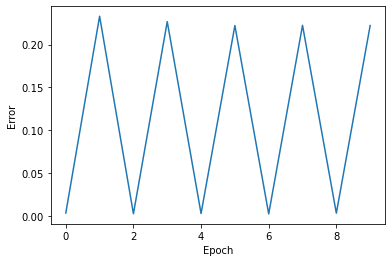

In [11]:
epochs = 5
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX.values))).batch(batchsize)



#for i in range(epochs):
#    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
#        batch = trX[start:end]
#        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        prv_w = cur_w
#        prv_vb = cur_vb
#        prv_hb = cur_hb
#    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
#    print (errors[-1])
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX.values)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

<hr>

# Predict Rating

We can now predict movies that an arbitrarily selected user might like. This can be accomplished by feeding in the user's watched movie preferences into the RBM and then reconstructing the input. The values that the RBM gives us will attempt to estimate the user's preferences for movies that he hasn't watched based on the preferences of the users that the RBM was trained on.

Lets first select a <b>User ID</b> of our mock user:

In [12]:
def predict_rating(userID):
    inputUser = trX.loc[userID].values.reshape(1, -1) # Get user column from user item matrix
    v0 = tf.convert_to_tensor(trX.loc[userID],"float32") # Convert into a tensor
    
    #Feeding in the user, reconstructing and unnormalizing the input
    hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)
    rec = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)*5
    
    rec_series = pd.Series(rec[0],index = user_item_mat.columns)
    return rec_series

def get_movie_by_id(mv_id):
    return movieid_dict[mv_id]

def get_user_rated_movies_index(uid):
    """Get the movieID of movies watched by user from the rating dataset"""
    rate_df = ratings_df.loc[ratings_df["userId"]==uid,["movieId","rating"]]
    movie_indexs = rate_df['movieId'].values
    return movie_indexs

def recommend_new_movie(userID, no_of_movies = 10):
    """ Get recommendation lists for new movies """
    watched_movie_id = get_user_rated_movies_index(userID) #Get the ID of watched movie
    predicted_ratings = predict_rating(userID) #Get predicted movie from users
    
    movies_not_watched = predicted_ratings.drop(watched_movie_id) #Remove watched movie from the predicted movie list
    
    movie_names = list(map(get_movie_by_id,movies_not_watched.index)) # Get movies titles
    movies_not_watched.index = movie_names #Assign the movie titles as the new index
    movies_not_watched.sort_values(ascending = False, inplace = True) # Sort ratings from high to low
    
    return movies_not_watched.head(no_of_movies)
    

In [13]:
mock_user_id = 215
rec215 = predict_rating(mock_user_id)
rec215

movieId
1         0.441025
2         0.029805
3         0.000372
4         0.004764
5         0.003970
            ...   
146684    0.000667
146878    0.000692
148238    0.001874
148626    0.000222
149532    0.000360
Length: 10325, dtype: float32

We can then list the 20 most recommended movies for our mock user by sorting it by their scores given by our model.

In [14]:
recommend_new_movie(2, 20)

Trainspotting (1996)                                 3.383915
Sabrina (1995)                                       3.377202
Hunchback of Notre Dame, The (1996)                  3.051631
Jerry Maguire (1996)                                 2.988484
Birdcage, The (1996)                                 2.633141
Sixth Sense, The (1999)                              2.570050
Rock, The (1996)                                     2.381903
Star Wars: Episode VI - Return of the Jedi (1983)    1.426319
Boot, Das (Boat, The) (1981)                         1.314069
Truth About Cats & Dogs, The (1996)                  1.207402
Braveheart (1995)                                    0.905611
Mirror Has Two Faces, The (1996)                     0.685349
Tin Cup (1996)                                       0.558105
Substitute, The (1996)                               0.548001
Up Close and Personal (1996)                         0.482535
Cry, the Beloved Country (1995)                      0.460852
Ransom (

<hr>

# Evaluation 

In [15]:
rec215 = predict_rating(215)

In [16]:
user215 = ratings_df[ratings_df.userId == 215]
user215.head()

,userId,movieId,rating,timestamp
29670,215,1,3.5,1433873781
29671,215,50,4.0,1433873962
29672,215,260,4.5,1433873860
29673,215,318,4.0,1433874107
29674,215,356,3.0,1433873775


In [17]:
user215_predicted_rating = user215['movieId'].apply(lambda x: rec215[x])

In [18]:
mean_absolute_error(user215['rating'],user215_predicted_rating)

2.4805103093385696

___

Let's bring them all together as a function

In [19]:
def evaluate(userID):
    user_rating_df = ratings_df[ratings_df.userId == userID] # Get user rating df
    
    true_rating = user_rating_df['rating'] # User rating
    
    user_rating = predict_rating(userID)
    predicted_rating = user_rating_df['movieId'].apply(lambda x:user_rating[x]) # Get rating from recommendation
    
    MAE = mean_absolute_error(true_rating,predicted_rating) 
    
    return MAE

## Evaluate on top 20 users with most reviews

In [20]:
# get the users that watch the most movies
test_usersID = ratings_df['userId'].value_counts().head(20)
test_usersID = test_usersID.index

test_usersID

Int64Index([668, 575, 458, 232, 310, 475, 128, 224, 607,  63, 451, 627, 413,
             62, 461, 164, 354, 402, 220, 109],
           dtype='int64')

In [21]:
MAE_from_top_20_users = []

for user in test_usersID:
    MAE_from_top_20_users.append(evaluate(user))

MAE_table = pd.Series(data = MAE_from_top_20_users, index=test_usersID)

CF_MAE_table = pd.DataFrame(MAE_table, columns = ["MAE"])
CF_MAE_table.index.name = "user_Id"
CF_MAE_table

,MAE
user_Id,
668,2.381445
575,2.649631
458,2.955530
232,3.457574
310,2.382731
475,2.848056
128,2.885504
224,2.742837
607,2.271996


In [23]:
print("mean:",MAE_table.mean())
print("std:",MAE_table.std())

mean: 2.6138339267955284
std: 0.45210549326378074


In [ ]:
MAE_table.hist()